Alanis - Identifying relationships between variables & attempting to make predictions on Death Count using Vaccination Count, Avg Temp, and Population

In [ ]:
# Dependencies
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from google.colab import files
import io

In [ ]:
merged_file = files.upload()

Saving Merged_Data.csv to Merged_Data (3).csv


In [ ]:
merged_data = pd.read_csv(io.BytesIO(merged_file['Merged_Data (3).csv']))
merged_data.head()

,Year,County,State,Administered_Dose_Count,Population,Avg Temp,Max Temp,Min Temp,Death Per 100k
0,2021.0,Abbeville County,South Carolina,10308.0,24262.0,62.5,73.1,52.0,3139.068511
1,2022.0,Abbeville County,South Carolina,11362.0,24338.0,62.7,73.7,51.6,3139.068511
2,2023.0,Abbeville County,South Carolina,11411.0,24434.0,63.3,74.5,52.2,3139.068511
3,2021.0,Acadia Parish,Louisiana,35002.0,57217.0,68.2,77.4,59.1,3917.576873
4,2022.0,Acadia Parish,Louisiana,37424.0,56725.0,68.1,78.3,57.8,3917.576873


# Data Preparation

In [ ]:
# Data preparation
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9781 entries, 0 to 9780
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     9767 non-null   float64
 1   County                   9781 non-null   object 
 2   State                    9781 non-null   object 
 3   Administered_Dose_Count  9767 non-null   float64
 4   Population               9251 non-null   float64
 5   Avg Temp                 9068 non-null   float64
 6   Max Temp                 9068 non-null   float64
 7   Min Temp                 9068 non-null   float64
 8   Death Per 100k           9120 non-null   float64
dtypes: float64(7), object(2)
memory usage: 687.9+ KB


In [ ]:
# Data preparation
merged_data.describe()

,Year,Administered_Dose_Count,Population,Avg Temp,Max Temp,Min Temp,Death Per 100k
count,9767.000000,9.767000e+03,9.251000e+03,9068.000000,9068.000000,9068.000000,9120.000000
mean,2021.974301,8.060694e+04,1.108879e+05,55.961943,67.220390,44.695015,3629.103304
std,0.836069,2.829744e+05,3.618588e+05,8.326896,8.531471,8.370424,1359.351541
min,2020.000000,1.000000e+00,4.300000e+01,33.400000,45.000000,19.700000,348.389463
25%,2021.000000,6.044500e+03,1.116350e+04,49.800000,60.700000,38.800000,2804.989781
50%,2022.000000,1.534700e+04,2.638200e+04,55.800000,67.100000,44.500000,3478.252697
75%,2023.000000,4.501900e+04,7.002200e+04,62.300000,74.000000,50.800000,4208.963941
max,2023.000000,8.444862e+06,9.992813e+06,78.800000,89.600000,70.500000,27754.759239


In [ ]:
merged_data.columns

Index(['Year', 'County', 'State', 'Administered_Dose_Count', 'Population',
       'Avg Temp', 'Max Temp', 'Min Temp', 'Death Per 100k'],
      dtype='object')

In [ ]:
# Data preparation before removing and filling missing data
merged_data_backup = merged_data.copy()

Data Preparation

In [ ]:
# Check missing data
print(merged_data.isna().sum())

Year                        14
County                       0
State                        0
Administered_Dose_Count     14
Population                 530
Avg Temp                   713
Max Temp                   713
Min Temp                   713
Death Per 100k             661
dtype: int64


In [ ]:
# Remove missing rows
merged_data = merged_data.dropna()

In [ ]:
merged_data.head()

,Year,County,State,Administered_Dose_Count,Population,Avg Temp,Max Temp,Min Temp,Death Per 100k
0,2021.0,Abbeville County,South Carolina,10308.0,24262.0,62.5,73.1,52.0,3139.068511
1,2022.0,Abbeville County,South Carolina,11362.0,24338.0,62.7,73.7,51.6,3139.068511
2,2023.0,Abbeville County,South Carolina,11411.0,24434.0,63.3,74.5,52.2,3139.068511
3,2021.0,Acadia Parish,Louisiana,35002.0,57217.0,68.2,77.4,59.1,3917.576873
4,2022.0,Acadia Parish,Louisiana,37424.0,56725.0,68.1,78.3,57.8,3917.576873


Death Per 100k

In [ ]:
highest_death = merged_data.sort_values(by='Death Per 100k', ascending=False)
highest_death.head(10)

,Year,County,State,Administered_Dose_Count,Population,Avg Temp,Max Temp,Min Temp,Death Per 100k
6050,2023.0,Montour County,Pennsylvania,18052.0,17860.0,52.2,62.6,41.9,27754.759239
6049,2022.0,Montour County,Pennsylvania,17839.0,18054.0,50.5,61.3,39.8,27754.759239
6048,2021.0,Montour County,Pennsylvania,15942.0,18089.0,51.9,61.8,42.1,27754.759239
6775,2023.0,Perry County,Kentucky,18626.0,27133.0,57.5,69.2,45.8,12729.886117
6773,2021.0,Perry County,Kentucky,17429.0,27927.0,56.8,68.0,45.5,12729.886117
6774,2022.0,Perry County,Kentucky,18567.0,27367.0,56.0,67.9,44.1,12729.886117
6291,2023.0,Newton County,Missouri,18390.0,60677.0,59.9,71.8,48.1,10471.842708
6289,2021.0,Newton County,Missouri,16713.0,59440.0,58.7,69.4,48.1,10471.842708
6290,2022.0,Newton County,Missouri,18266.0,60096.0,58.3,70.0,46.6,10471.842708
770,2021.0,Boyd County,Kentucky,25200.0,47757.0,56.1,66.8,45.4,10310.291473


In [ ]:
merged_data = merged_data[merged_data['County'] != 'Montour County']
merged_data.head()

,Year,County,State,Administered_Dose_Count,Population,Avg Temp,Max Temp,Min Temp,Death Per 100k
0,2021.0,Abbeville County,South Carolina,10308.0,24262.0,62.5,73.1,52.0,3139.068511
1,2022.0,Abbeville County,South Carolina,11362.0,24338.0,62.7,73.7,51.6,3139.068511
2,2023.0,Abbeville County,South Carolina,11411.0,24434.0,63.3,74.5,52.2,3139.068511
3,2021.0,Acadia Parish,Louisiana,35002.0,57217.0,68.2,77.4,59.1,3917.576873
4,2022.0,Acadia Parish,Louisiana,37424.0,56725.0,68.1,78.3,57.8,3917.576873


In [ ]:
highest_death = merged_data.sort_values(by='Death Per 100k', ascending=False)
highest_death.head(10)

,Year,County,State,Administered_Dose_Count,Population,Avg Temp,Max Temp,Min Temp,Death Per 100k
6775,2023.0,Perry County,Kentucky,18626.0,27133.0,57.5,69.2,45.8,12729.886117
6774,2022.0,Perry County,Kentucky,18567.0,27367.0,56.0,67.9,44.1,12729.886117
6773,2021.0,Perry County,Kentucky,17429.0,27927.0,56.8,68.0,45.5,12729.886117
6289,2021.0,Newton County,Missouri,16713.0,59440.0,58.7,69.4,48.1,10471.842708
6291,2023.0,Newton County,Missouri,18390.0,60677.0,59.9,71.8,48.1,10471.842708
6290,2022.0,Newton County,Missouri,18266.0,60096.0,58.3,70.0,46.6,10471.842708
771,2022.0,Boyd County,Kentucky,27646.0,48059.0,55.4,66.9,43.9,10310.291473
770,2021.0,Boyd County,Kentucky,25200.0,47757.0,56.1,66.8,45.4,10310.291473
772,2023.0,Boyd County,Kentucky,27863.0,47826.0,57.1,68.6,45.6,10310.291473
6434,2023.0,Ohio County,West Virginia,31637.0,41194.0,53.0,63.6,42.5,9707.724426


# Random Forest Model

Define Variables

In [ ]:
# Variables
X = merged_data[['Administered_Dose_Count', 'Population', 'Avg Temp']]
y = merged_data['Death Per 100k']

Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split into Training and Testing Sets

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

Train the Random Forest Model

In [ ]:
# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluate the Model
* Mean Squared Error: how much the predictions deviate from the actual values. (we want low scores)
* R-squared: how well the model explains the variance in the target variable. (we want a value closer to 1)
* Mean Absolute Error: measure of the average size of the mistakes in a collection of predictions (we want low scores)
* Root Mean Square Error: the average difference between predicted values from a model and the actual observed values (we want low scores)

In [ ]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the mse and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")

Mean Squared Error: 984501.9041394652
R-squared: 0.21677770099886673
Mean Absolute Error: 744.9365655380785
Root Mean Square Error: 992.220693263079


Feature Importance

In [ ]:
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

print(feature_importance)

                   feature  importance
1               Population    0.400087
0  Administered_Dose_Count    0.330818
2                 Avg Temp    0.269095


# Clustering

<ipython-input-21-65976897e779>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Cluster'] = clusters


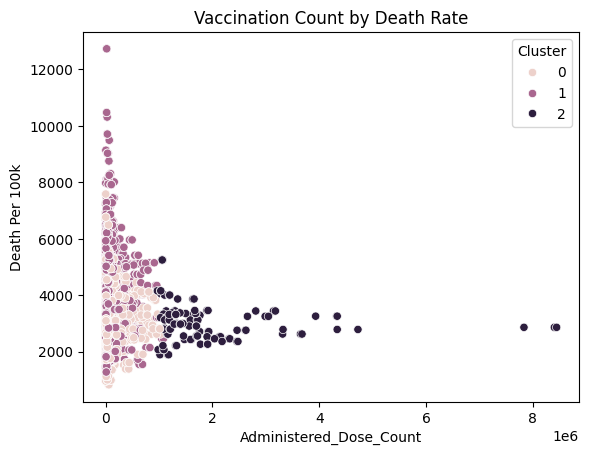

In [ ]:
# Select features and scale data for clustering
features = merged_data[['Administered_Dose_Count', 'Death Per 100k', 'Population', 'Avg Temp']]
features_scaled = StandardScaler().fit_transform(features.dropna())

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(features_scaled)

merged_data['Cluster'] = clusters
sns.scatterplot(x='Administered_Dose_Count', y='Death Per 100k', hue='Cluster', data=merged_data)
plt.title('Vaccination Count by Death Rate')
plt.savefig("Vaccine_Count_Cluster.png")
plt.show()

<ipython-input-22-2ac9ba1026d8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Cluster'] = clusters


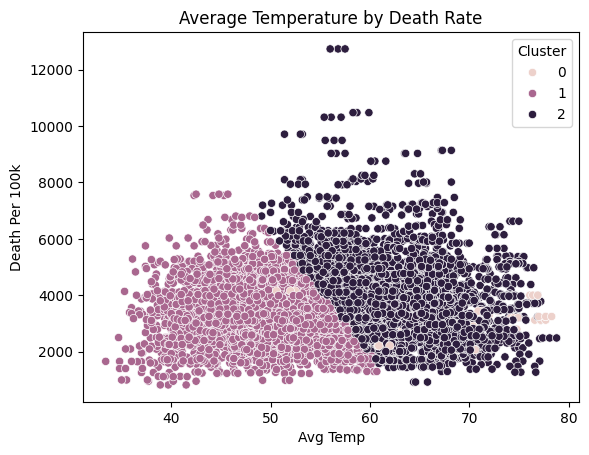

In [ ]:
# Select features and scale data for clustering
features = merged_data[['Administered_Dose_Count', 'Death Per 100k', 'Population', 'Avg Temp']]
features_scaled = StandardScaler().fit_transform(features.dropna())

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(features_scaled)

merged_data['Cluster'] = clusters
sns.scatterplot(x='Avg Temp', y='Death Per 100k', hue='Cluster', data=merged_data)
plt.title('Average Temperature by Death Rate')
plt.savefig("Avg_Temp_Cluster.png")
plt.show()

<ipython-input-23-034cddc8b117>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Cluster'] = clusters


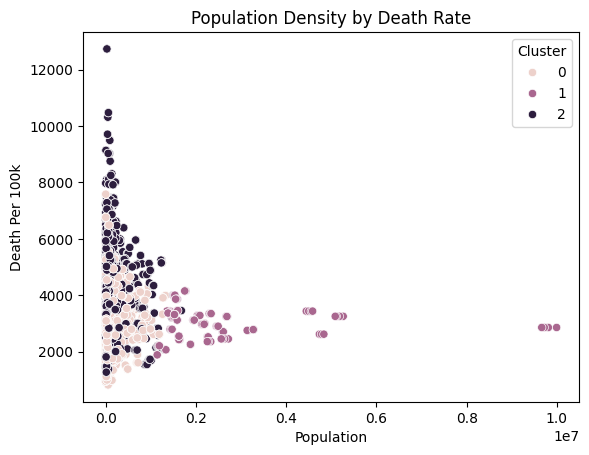

In [ ]:
# Select features and scale data for clustering
features = merged_data[['Administered_Dose_Count', 'Death Per 100k', 'Population', 'Avg Temp']]
features_scaled = StandardScaler().fit_transform(features.dropna())

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(features_scaled)

merged_data['Cluster'] = clusters
sns.scatterplot(x='Population', y='Death Per 100k', hue='Cluster', data=merged_data)
plt.title('Population Density by Death Rate')
plt.savefig("Population_Cluster.png")
plt.show()

In [ ]:
files.download("Vaccine_Count_Cluster.png")
files.download("Avg_Temp_Cluster.png")
files.download("Population_Cluster.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Neural Networks

In [ ]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Layers
num_input_features = len(X_train_scaled[0])
hidden_nodes_layer01 = 60
hidden_nodes_layer02 = 30
hidden_nodes_layer03 = 20 # add layer to try to improve accuracy

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer01, input_dim=num_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer02, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer03, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 60)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,711 (10.59 KB)

 Trainable params: 2,711 (10.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Complile & make predictions
opt_learning_rate = tf.keras.optimizers.Adam(learning_rate=0.001) # Decreased learning rate to 0.001 to try to improve accuracy
nn.compile(loss = 'binary_crossentropy', optimizer = opt_learning_rate, metrics=['accuracy'])

# Fit model
nn.fit(X_train_scaled, y_train, epochs=120, batch_size=32) # increase epochs from 100 to 120 to try to improve accuracy

# Make predictions
y_pred = nn.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))

Epoch 1/120
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: -57540.9219
Epoch 2/120
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -5117138.5000
Epoch 3/120
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -56349460.0000
Epoch 4/120
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -250943760.0000
Epoch 5/120
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -725253120.0000
Epoch 6/120
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -1623956096.0000
Epoch 7/120
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -3132611840.0000
Epoch 8/120
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -5383619072.0000
Epoch 9/120
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -8608983040.0000
Epoch 10/120
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -12760430592.0000


In [ ]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

70/70 - 0s - 4ms/step - accuracy: 0.0000e+00 - loss: -5.2254e+13
Loss: -52253683613696.0, Accuracy: 0.0


# Linear Regression

In [ ]:
# Variables
X = merged_data[['Administered_Dose_Count', 'Population', 'Avg Temp']]
y = merged_data['Death Per 100k']

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")

Mean Squared Error: 1242681.151608046
R-squared: 0.0009345165646152953
Mean Absolute Error: 852.1204437361965
Root Mean Square Error: 1114.7560951203836


# Viewing Changes Over Time / Visualizations

Correlation Matrix

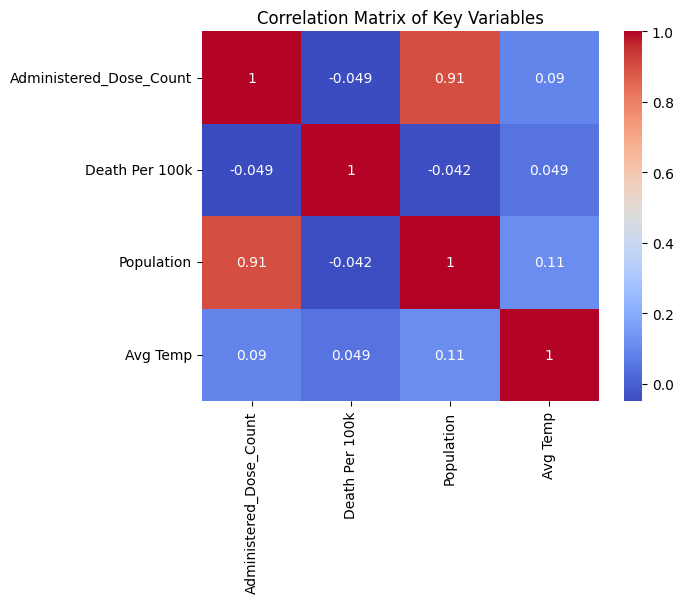

In [ ]:
corr_matrix = merged_data[['Administered_Dose_Count', 'Death Per 100k', 'Population', 'Avg Temp']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Key Variables")
plt.show()

Scatter Plots

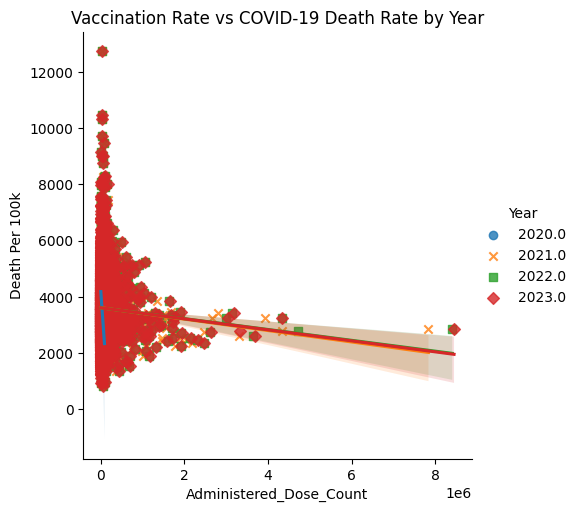

In [ ]:
sns.lmplot(x='Administered_Dose_Count', y='Death Per 100k', data=merged_data, hue='Year', markers=["o", "x", "s", "D"])
plt.title('Vaccination Rate vs COVID-19 Death Rate by Year')
plt.show()

Text(0.5, 1.0, 'Population Density vs COVID-19 Death Rate by Year')

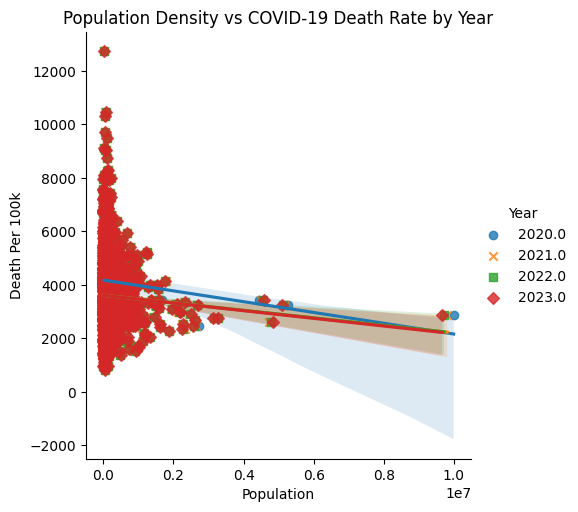

In [ ]:
sns.lmplot(x='Population', y='Death Per 100k', data=merged_data, hue='Year', markers=["o", "x", "s", "D"])
plt.title('Population Density vs COVID-19 Death Rate by Year')

Text(0.5, 1.0, 'Average Temperature vs COVID-19 Death Rate by Year')

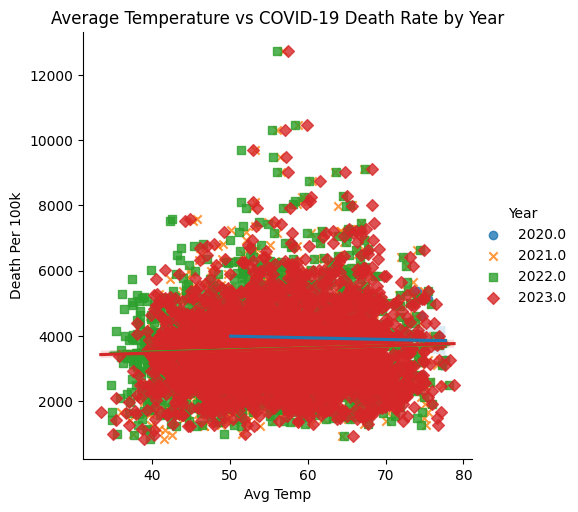

In [ ]:
sns.lmplot(x='Avg Temp', y='Death Per 100k', data=merged_data, hue='Year', markers=["o", "x", "s", "D"])
plt.title('Average Temperature vs COVID-19 Death Rate by Year')

Box Plots

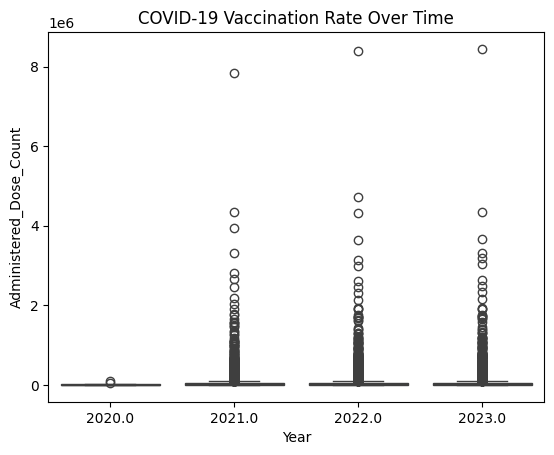

In [ ]:
sns.boxplot(x='Year', y='Administered_Dose_Count', data=merged_data)
plt.title('COVID-19 Vaccination Rate Over Time')
plt.show()

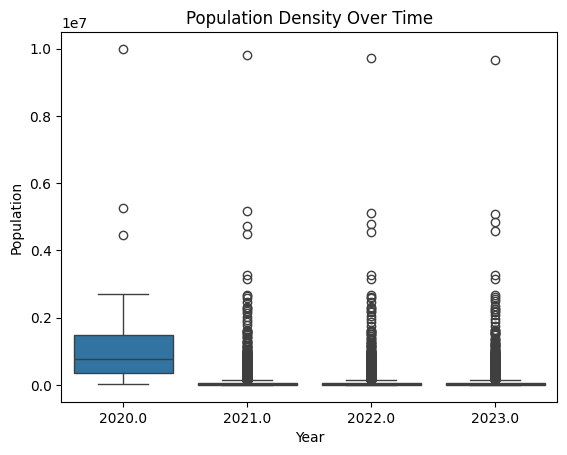

In [ ]:
sns.boxplot(x='Year', y='Population', data=merged_data)
plt.title('Population Density Over Time')
plt.show()

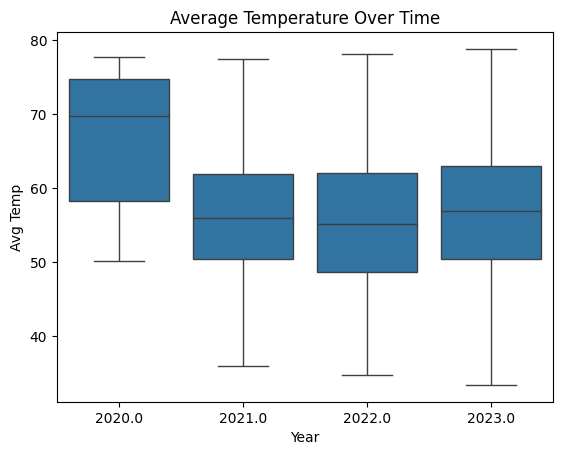

In [ ]:
sns.boxplot(x='Year', y='Avg Temp', data=merged_data)
plt.title('Average Temperature Over Time')
plt.show()